<a href="https://colab.research.google.com/github/hiiamjay/Machine-Learning/blob/master/Experiments/ML_EXP_4_7_8_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Assignment 1:**







In [1]:
import numpy as np # useful for many scientific computing in Python
import pandas as pd # primary data structure library
import matplotlib.pyplot as plt
import matplotlib as mpl
 
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
 sheet_name='Canada by Citizenship',
 skiprows=range(20),
 skipfooter=2
 )
 
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [2]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis='columns', inplace=True)
df_can.rename(columns={'OdName':'Country', 'AreaName': 'Continent', 'RegName': 'Continent-Region', 'DevName':'Development-status'}, inplace=True)
df_can.set_index('Country', inplace=True)
df_can['Total'] = df_can.sum(axis='columns')
years = range(1980, 2014)
df_can.head()

,Continent,Continent-Region,Development-status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


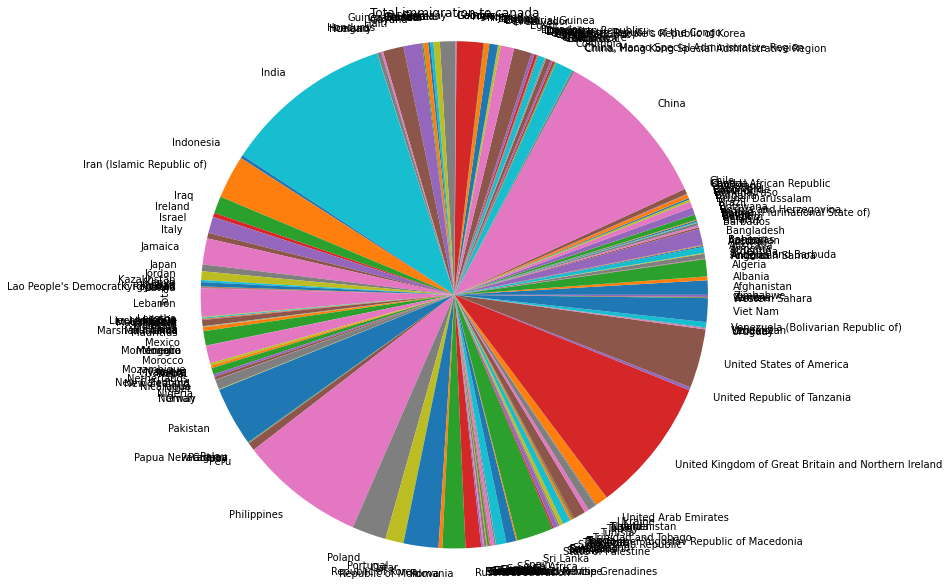

In [4]:
df_can['Total'].plot(kind='pie', figsize=(10,10))
plt.title('Total immigration to canada')
plt.axis('equal') #pie chart as circle else it will be a little tilted
plt.show()

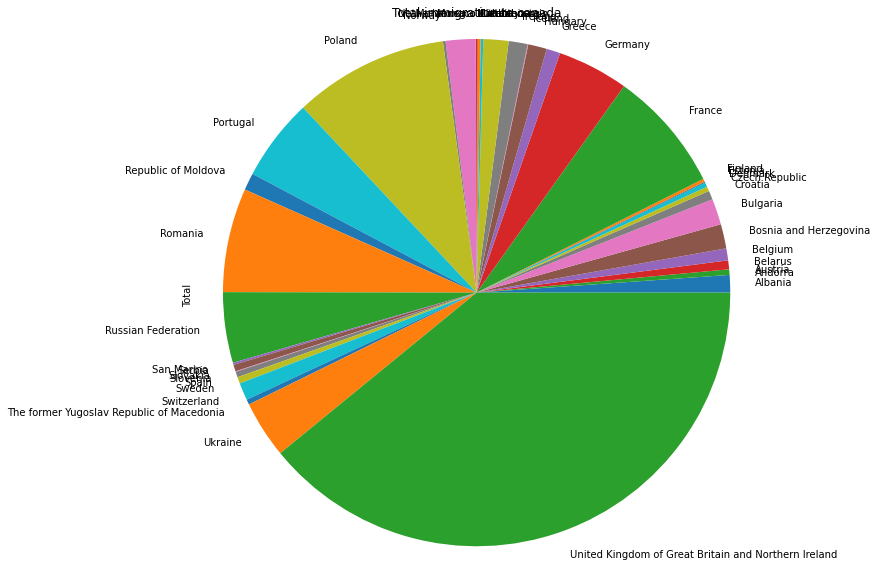

In [6]:
#Only Europe countries
condition=df_can['Continent']=='Europe'
dfnew=df_can[(condition)]

dfnew['Total'].plot(kind='pie', figsize=(10,10))

plt.title('Total immigration to canada')
plt.axis('equal') 
plt.show()

1) By Continent-region pie-chart use colorlists, explode, pct, figsize, add title, add axes, add legend, remove labels and use shadows.


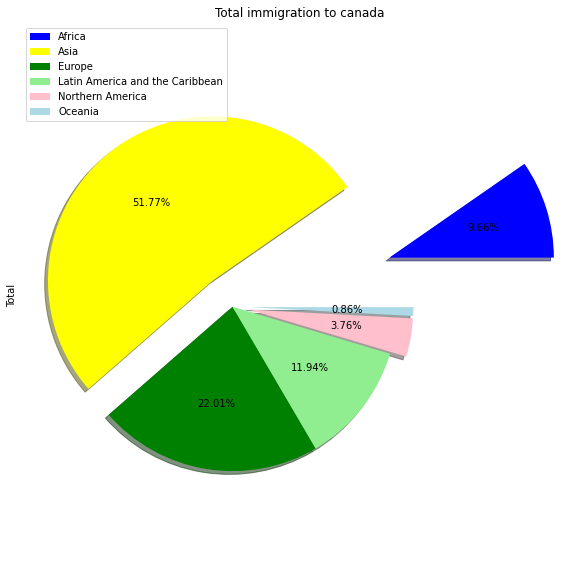

In [11]:
#All countries of same continent are added up row wise(index)
dfnew1=df_can.groupby('Continent',axis='index').sum()
dfnew1.head()


colorlist = ['blue','yellow','green','lightgreen','pink','lightblue']
explodelist=[1,0.2,0,0,0.1,0.1]

dfnew1['Total'].plot(kind='pie', figsize=(10,10), autopct='%1.2f%%', shadow=True, labels=None, colors=colorlist, explode=explodelist)

plt.title('Total immigration to canada')
plt.axis('equal') 
plt.legend(labels=dfnew1.index, loc='upper left')
plt.show()

2) By Development-status pie-chart use colorlists, explode, pct, figsize, add title, add axes, add legend, remove labels and use shadows.

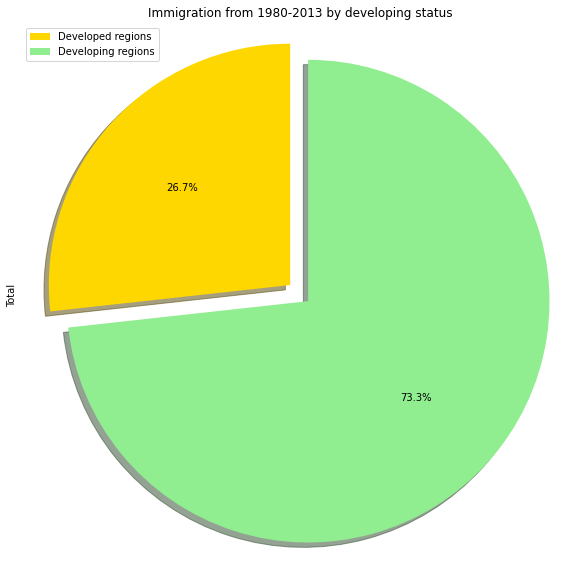

In [12]:
# plot pie chart of dev status 
#All countries of same continent are added up row wise(index)
dfnew1=df_can.groupby('Development-status',axis='index').sum()
dfnew1.head()

colorlist = ['gold', 'lightgreen']
explodelist = [0,0.1]

dfnew1['Total'].plot(kind='pie', figsize=(10,10), startangle=90, autopct='%1.1f%%', shadow=True, labels=None, colors=colorlist, explode=explodelist)

plt.title('Immigration from 1980-2013 by developing status')
plt.axis('equal')
plt.legend(labels=dfnew1.index, loc='upper left')
plt.show()

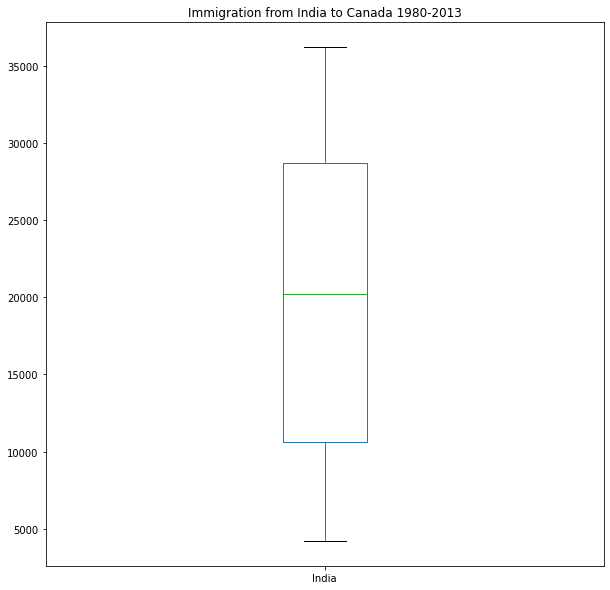

In [13]:
df_can.head()

df_india = df_can.loc[['India'],years].transpose()
df_india.head()

df_india.plot(
    kind="box",
    figsize=(10,10)
)
plt.title("Immigration from India to Canada 1980-2013")
plt.show()

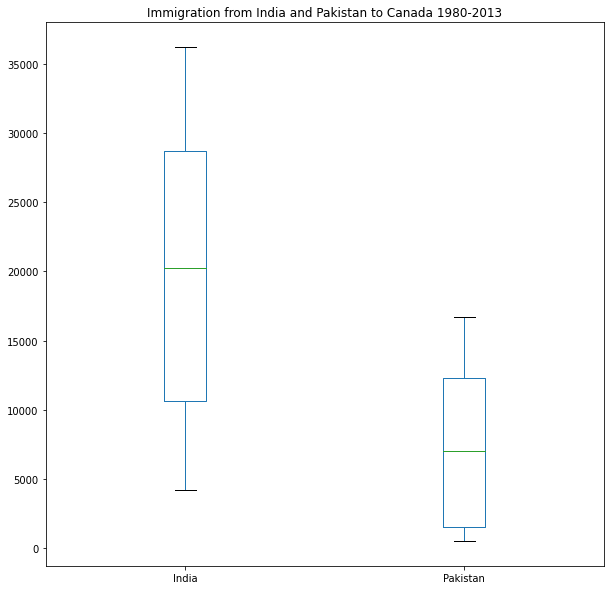

In [14]:
df_indiapak = df_can.loc[['India','Pakistan'],years].transpose()
df_indiapak.head()

df_indiapak.plot(
    kind="box",
    figsize=(10,10)
)
plt.title("Immigration from India and Pakistan to Canada 1980-2013")
plt.show()

In [25]:
df_can = df_can.T
df_can.rename(columns={'United Kingdom of Great Britain and Northern Ireland':'UK'}, inplace=True)
df_can = df_can.T

In [27]:
df_can.sort_values(by='Total', ascending=False, inplace=True, axis='index')
dftop5 = df_can.head(5)
dftop5 = dftop5[years].transpose()
dfbottom5 = df_can.tail(5)
dfbottom5 = dfbottom5[years].transpose()

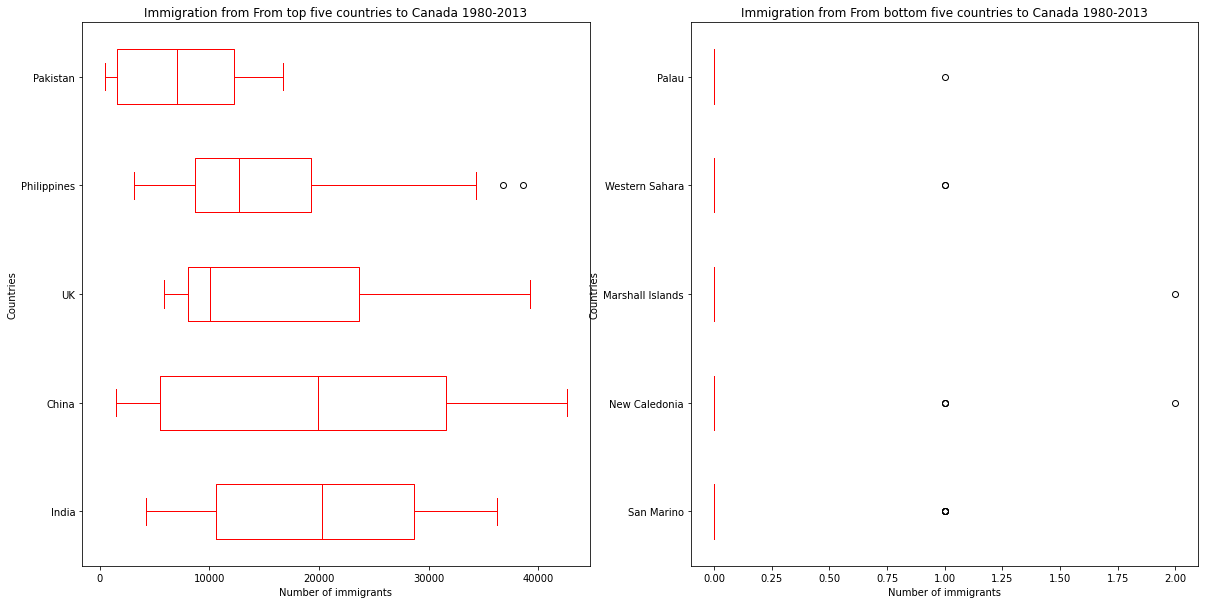

In [28]:
fig = plt.figure()

ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)


dftop5.plot(kind="box",figsize=(20,10),vert=False,color='red', ax=ax0)
ax0.set_title("Immigration from From top five countries to Canada 1980-2013")
ax0.set_xlabel("Number of immigrants")
ax0.set_ylabel("Countries")

dfbottom5.plot(kind="box",figsize=(20,10),vert=False,color='red', ax=ax1)
ax1.set_title("Immigration from From bottom five countries to Canada 1980-2013")
ax1.set_xlabel("Number of immigrants")
ax1.set_ylabel("Countries")

plt.show()

3) Create 4 subplots - to display boxplot of top 5 countries in europe, asia, africa, oceania.


In [29]:
years=range(1980,2014)
condition=df_can['Continent']=='Europe'
dfnew=df_can[(condition)]

dfnew.sort_values(by="Total",axis='index',inplace=True,ascending=False)


dtope=dfnew.head(5)
dtope=dtope[years]
dtope=dtope.transpose()
dtope.rename(columns={'United Kingdom of Great Britain and Northern Ireland':'UK'}, inplace=True)
dtope.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Country,UK,Poland,France,Romania,Portugal
2009,8876,1013,5051,2076,623
2010,8724,795,4646,1922,629
2011,6204,720,4080,1776,528
2012,6195,779,6280,1588,560
2013,5827,852,5623,1512,630


In [30]:
years=range(1980,2014)
condition=df_can['Continent']=='Asia'
dfnew=df_can[(condition)]

dfnew.sort_values(by="Total",axis='index',inplace=True,ascending=False)


dtopa=dfnew.head(5)
dtopa=dtopa[years]
dtopa=dtopa.transpose()
dtopa.rename(columns={'Iran (Islamic Republic of)':'Iran'}, inplace=True)

dtopa.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Country,India,China,Philippines,Pakistan,Iran
2009,29456,29622,28573,7217,6580
2010,34235,30391,38617,6811,7477
2011,27509,28502,36765,7468,7479
2012,30933,33024,34315,11227,7534
2013,33087,34129,29544,12603,11291


In [31]:
years=range(1980,2014)
condition=df_can['Continent']=='Africa'
dfnew=df_can[(condition)]

dfnew.sort_values(by="Total",axis='index',inplace=True,ascending=False)


dtopaf=dfnew.head(5)
dtopaf=dtopaf[years]
dtopaf=dtopaf.transpose()
dtopaf.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Country,Egypt,Morocco,Algeria,Somalia,South Africa
2009,3496,5532,5393,1214,1188
2010,5982,6242,4752,1528,1238
2011,4663,4399,4325,1535,959
2012,5555,3878,3774,1582,1243
2013,4165,3261,4331,2028,1240


In [32]:
years=range(1980,2014)
condition=df_can['Continent']=='Oceania'
dfnew=df_can[(condition)]

dfnew.sort_values(by="Total",axis='index',inplace=True,ascending=False)


dtopo=dfnew.head(5)
dtopo=dtopo[years]
dtopo=dtopo.transpose()
dtopo.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Country,Australia,Fiji,New Zealand,Tonga,Samoa
2009,1018,311,520,5,2
2010,933,398,490,5,5
2011,851,316,375,2,3
2012,982,270,417,3,2
2013,1121,228,415,5,0


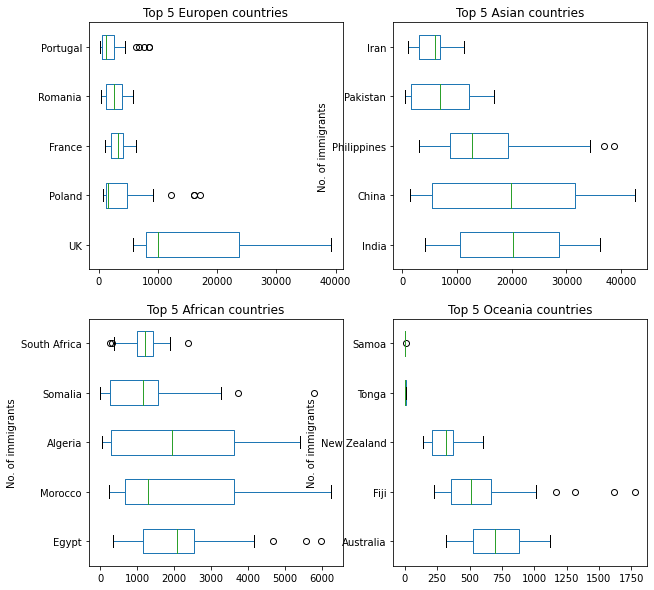

In [33]:
#using subplots

fig=plt.figure()

#Create 2 subplots
ax1=fig.add_subplot(2,2,1)#2 row,2 columsn-1st figure
ax2=fig.add_subplot(2,2,2)#2 row,2 columsn-2nd figure
ax3=fig.add_subplot(2,2,3)#2 row,2 columsn-3rd figure
ax4=fig.add_subplot(2,2,4)#2 row,2 columsn-4th figure

#write whic is ax1 and which is ax2
dtope.plot(kind='box',figsize=(10,10),vert=False,ax=ax1)
ax1.set_title("Top 5 Europen countries")
ax2.set_ylabel('No. of immigrants')

dtopa.plot(kind='box',figsize=(10,10),vert=False,ax=ax2)
ax2.set_title("Top 5 Asian countries")
ax2.set_ylabel('No. of immigrants')

dtopaf.plot(kind='box',figsize=(10,10),vert=False,ax=ax3)
ax3.set_title("Top 5 African countries")
ax3.set_ylabel('No. of immigrants')

dtopo.plot(kind='box',figsize=(10,10),vert=False,ax=ax4)
ax4.set_title("Top 5 Oceania countries")
ax4.set_ylabel('No. of immigrants')

plt.show()


4) Identify countries which are outliers based on total migration.


In [34]:
df_can.describe()

,Continent,Continent-Region,Development-status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195
unique,6,22,2,103,103,101,100,106,103,109,115,115,116,118,121,139,144,142,141,147,145,141,144,151,155,148,149,156,156,155,159,161,157,163,160,163,162,190
top,Africa,Western Asia,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,952
freq,54,18,147,59,56,52,56,53,55,49,49,45,43,36,36,25,20,21,21,18,19,21,19,14,12,16,11,12,12,14,11,13,11,12,12,11,11,3


In [35]:
Q1 = 952
Q3 = 22239.5
IQR = Q3 - Q1

Outlier1 = Q1 - (1.5)*(IQR)
Outlier2 = Q3 + (1.5)*(IQR)

Outliers=df_can[(df_can['Total']< Outlier1 ) | (df_can['Total']> Outlier2 )]
Outliers.reset_index(inplace=True)
Outliers

,Country,Continent,Continent-Region,Development-status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
1,China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
2,UK,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,31668,23380,34123,33720,39231,30145,29322,22965,10367,7045,8840,11728,8046,6797,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
3,Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,12509,12718,13670,20479,19532,15864,13692,11549,8735,9734,10763,13836,11707,12758,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
4,Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,1072,1334,2261,2470,3079,4071,4777,4666,4994,9125,13073,9068,9979,15400,16708,15110,13205,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
5,United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,5892,6054,6842,7435,5901,4890,5515,4753,4437,5196,5433,5604,4948,5543,6990,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
6,Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,2989,3273,3781,3655,6250,6814,3959,2785,3956,6205,7982,7057,6208,5884,6169,8129,5918,6348,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
7,Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,4447,2779,2758,3525,7266,13102,9563,7150,9368,6484,5415,3566,4982,6081,5861,5279,4892,4495,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
8,Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,2338,2805,2979,2087,2598,3790,3819,3005,3501,3250,4093,4938,7108,7618,9619,7342,7117,5352,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581
9,Poland,Europe,Eastern Europe,Developed regions,863,2930,5881,4546,3588,2819,4808,6931,9211,16025,17040,16028,12145,6960,3550,2405,2136,1758,1488,1354,1471,1601,1447,1394,1533,1405,1263,1235,1267,1013,795,720,779,852,139241


In [41]:
dfscat=df_can[years].sum(axis='index')
type(dfscat)#new to convert to add frame
dfscat=pd.DataFrame(dfscat)
type(dfscat)

dfscat.reset_index(inplace=True)#to convert to 2 columns as first we had 1 column only
dfscat.columns=['Year','Total']
dfscat

,Year,Total
0,1980,99137.0
1,1981,110563.0
2,1982,104271.0
3,1983,75550.0
4,1984,73417.0
5,1985,69978.0
6,1986,86048.0
7,1987,134771.0
8,1988,139306.0
9,1989,164432.0


In [42]:
x=dfscat['Year']
y=dfscat['Total']
fit=np.polyfit(x,y,1)#Linear regression
fit#0 is slope & 1 is intercept


array([ 5.56709228e+03, -1.09261952e+07])

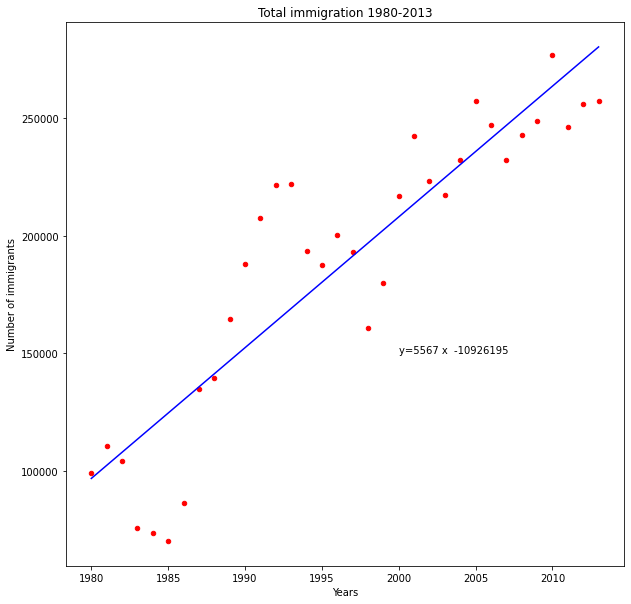

In [43]:
dfscat.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Total',
    color='red'
)
plt.title("Total immigration 1980-2013")
plt.xlabel("Years")
plt.ylabel("Number of immigrants")


plt.plot(x,fit[0]*x+fit[1], color='blue')

plt.annotate('y={0:.0f} x  {1: .0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

In [44]:
#Bubble plots

dfnew = df_can[years].transpose()
dfnew.reset_index(inplace=True)
dfnew.head()
dfnew.rename(columns={'index':'Year'}, inplace=True)
dfnew['Total'] = dfnew.sum(axis='columns')
dfnew=dfnew[['Year',"India","China"]]
dfnew.tail()

Country,Year,India,China
29,2009,29456,29622
30,2010,34235,30391
31,2011,27509,28502
32,2012,30933,33024
33,2013,33087,34129


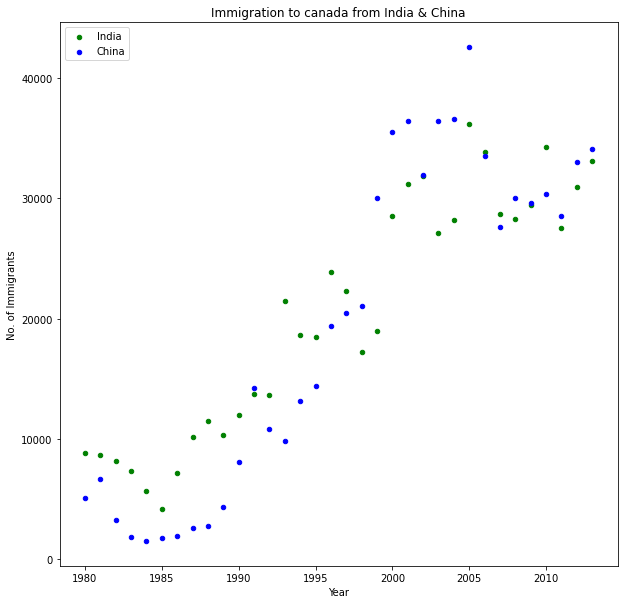

In [51]:
#normalize
#x'=(X-Xmin)/(Xmax-Xmin)

norm_india = (dfnew['India'] - dfnew['India'].min()) / (dfnew['India'].max() - dfnew['India'].min())

norm_china = (dfnew['China'] - dfnew['China'].min()) / (dfnew['China'].max() - dfnew['China'].min())

ax1=dfnew.plot(
    kind="scatter",
    x="Year",
    y="India",
    figsize=(10,10),
    color='green',
)

ax2=dfnew.plot(
    kind="scatter",
    x="Year",
    y="China",
    figsize=(10,10),
    color='blue',
    ax=ax1,
)

ax1.set_title("Immigration to canada from India & China")
ax1.set_ylabel("No. of Immigrants")
ax1.legend(['India','China'], loc='upper left')

5) Plot the bubble plot for Norway, Denmark, Finland

In [57]:
dfnew = df_can[years].transpose()
dfnew.reset_index(inplace=True)
dfnew.head()
dfnew.rename(columns={'index':'Year'}, inplace=True)
dfnew['Total'] = dfnew.sum(axis='columns')
dfnew=dfnew[['Year',"Denmark","Finland","Norway"]]
dfnew.tail()

Country,Year,Denmark,Finland,Norway
29,2009,81,63,75
30,2010,92,63,46
31,2011,93,72,49
32,2012,94,62,53
33,2013,81,76,59


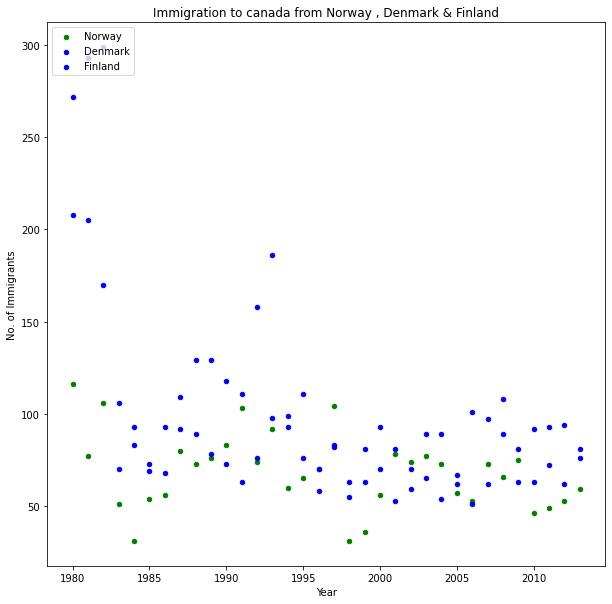

In [60]:
#normalize
#x'=(X-Xmin)/(Xmax-Xmin)

norm_Norway = (dfnew['Norway'] - dfnew['Norway'].min()) / (dfnew['Norway'].max() - dfnew['Norway'].min())
norm_Denamrk = (dfnew['Denmark'] - dfnew['Denmark'].min()) / (dfnew['Denmark'].max() - dfnew['Denmark'].min())
norm_Finland = (dfnew['Finland'] - dfnew['Finland'].min()) / (dfnew['Finland'].max() - dfnew['Finland'].min())

ax1=dfnew.plot(
    kind="scatter",
    x="Year",
    y="Norway",
    figsize=(10,10),
    color='green',
)

ax2=dfnew.plot(
    kind="scatter",
    x="Year",
    y="Denmark",
    figsize=(10,10),
    color='blue',
    ax=ax1,
)

ax3=dfnew.plot(
    kind="scatter",
    x="Year",
    y="Finland",
    figsize=(10,10),
    color='blue',
    ax=ax1,
)

ax1.set_title("Immigration to canada from Norway , Denmark & Finland")
ax1.set_ylabel("No. of Immigrants")
ax1.legend(['Norway','Denmark',"Finland"], loc='upper left')


#**Assignment 2:**

1) Scatter plot for Norway, Denmark and sweden

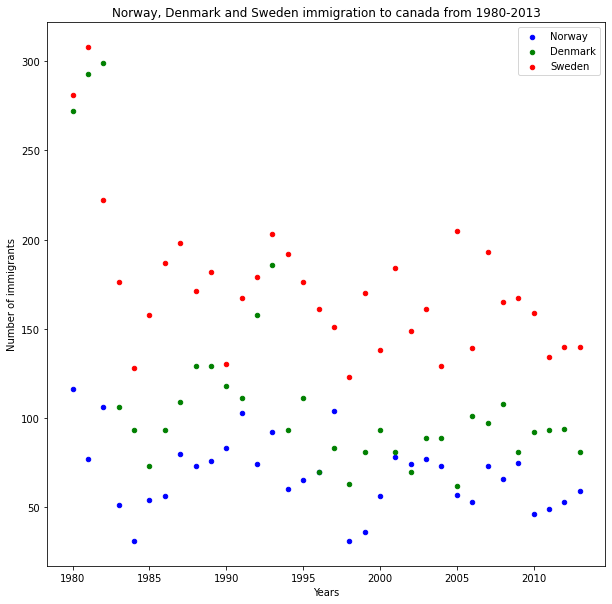

In [61]:
df = df_can.loc[['Norway','Denmark', 'Sweden'], years].transpose()
df.reset_index(inplace=True)
df.index.name = 'index'
df.rename(columns={'index':'Year'}, inplace=True)


ax0 = df.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Norway',
    color='blue'
)

ax1 = df.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Denmark',
    color='green',
    ax=ax0
)
ax2 = df.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Sweden',
    color='red',
    ax=ax0
)


ax0.set_title("Norway, Denmark and Sweden immigration to canada from 1980-2013")
ax0.set_xlabel("Years")
ax0.set_ylabel("Number of immigrants")
ax0.legend(['Norway', 'Denmark', 'Sweden'], loc='upper right')


2) Bubble plot for Norway, Denmark and Sweden

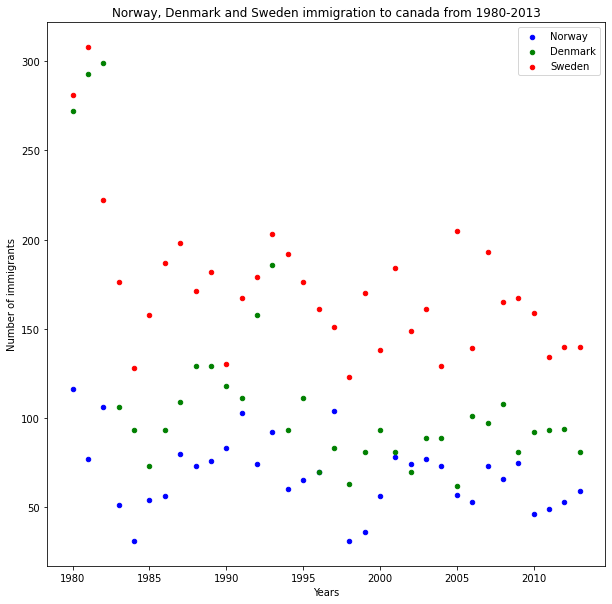

In [63]:
df = df_can.loc[['Norway','Denmark', 'Sweden'], years].transpose()
df.reset_index(inplace=True)
df.index.name = 'index'
df.rename(columns={'index':'Year'}, inplace=True)

normnor = (df['Norway'] - df['Norway'].min()) / (df['Norway'].max() - df['Norway'].min())
normden = (df['Denmark'] - df['Denmark'].min()) / (df['Denmark'].max() - df['Denmark'].min())
normfin = (df['Sweden'] - df['Sweden'].min()) / (df['Sweden'].max() - df['Sweden'].min())


ax0 = df.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Norway',
    color='blue',
)

ax1 = df.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Denmark',
    color='green',
    ax=ax0,
)
ax2 = df.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Sweden',
    color='red',
    ax=ax0,
)


ax0.set_title("Norway, Denmark and Sweden immigration to canada from 1980-2013")
ax0.set_xlabel("Years")
ax0.set_ylabel("Number of immigrants")
ax0.legend(['Norway', 'Denmark', 'Sweden'], loc='upper right')

3) Boxplot for Norway, denmark and sweden

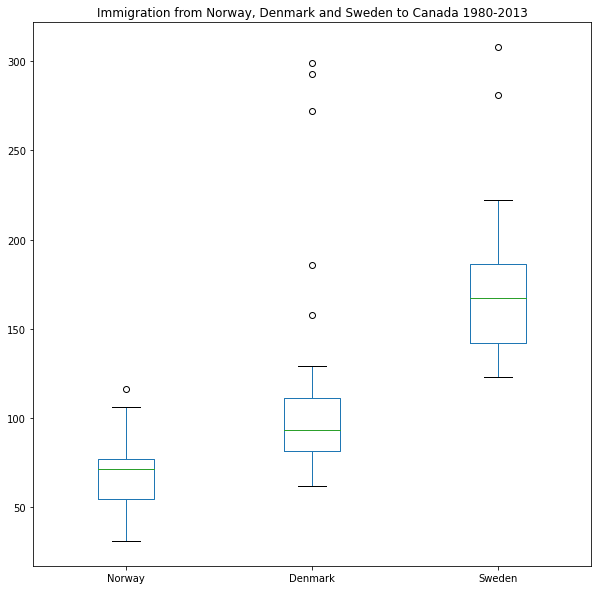

In [64]:
df_nds = df_can.loc[['Norway','Denmark', 'Sweden'],years].transpose()
df_nds.head()

df_nds.plot(
    kind="box",
    figsize=(10,10)
)
plt.title("Immigration from Norway, Denmark and Sweden to Canada 1980-2013")
plt.show()


4) Waffle Chart for Norway, denmark and sweden

In [65]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.2.2


In [66]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_nds.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )

In [68]:
df_nds = df_can.loc[['Norway','Denmark', 'Sweden'],:]
df_nds.head()
categories = df_nds.index.values

value = df_nds['Total']

#create a waffle chart

width=40
height=10

colormap = plt.cm.coolwarm

Total number of tiles is 400
Norway: 77
Denmark: 129
Sweden: 194


<Figure size 432x288 with 0 Axes>

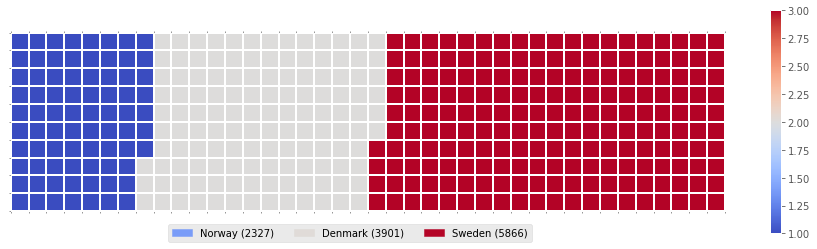

In [69]:
create_waffle_chart(categories, value, height, width, colormap)

6) Plot for mumbai city crimes (markers to map)

In [71]:
import numpy as np
import pandas as pd
import folium

In [72]:
df_incidents = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Police_Department_Incidents_-_Previous_Year__2016_.csv')

print('Dataset downloaded and read into a pandas dataframe!')

df_incidents.head()

df_incidents.shape


Dataset downloaded and read into a pandas dataframe!


(150500, 13)

In [73]:
df1 = df_incidents.iloc[0:100,:]

lat = 37.77
long = -122.42


map2 = folium.Map(location=[lat, long], zoom_start=12)

map2

In [74]:
#get dataset
df1 = df_incidents.iloc[0:100,:]

#created a map
lat = 19.0760
long = 72.8777
map2 = folium.Map(location=[lat, long], zoom_start=12)


#Step 2: type of markers to use
for lat, long, labs in zip(df1.Y, df1.X, df1.Category):
       folium.CircleMarker(
           [lat, long],
           radius=5,
           color='yellow',
           fill=True,  
           popup=labs        
       ).add_to(map2)
#Step 3: show map
map2

In [75]:
#get dataset
df1 = df_incidents.iloc[0:100,:]

#created a map
lat = 19.0760
long = 72.8777
map2 = folium.Map(location=[lat, long], zoom_start=12)


#Step 1: records have to be stores in  a datastricture
incidents = folium.map.FeatureGroup()



#Step 2: type of markers to use
for lat, long, labs in zip(df1.Y, df1.X, df1.Category):
   incidents.add_child(
       folium.CircleMarker(
           [lat, long],
           radius=5,
           color='yellow',
           fill=True,  
           popup=labs        
       ).add_to(incidents)


   )


#Step 3: add map
map2.add_child(incidents)

In [76]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

df_can.drop(['AREA','Type','Coverage','DEV','REG'], inplace=True, axis='columns')

df_can.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Continent-Region','DevName':'Development-status'}, inplace=True)

df_can['Total'] = df_can.sum(axis='columns')

years = range(1980, 2014)

df_can.head()

Data downloaded and read into a dataframe!


,Country,Continent,Continent-Region,Development-status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


In [77]:
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json -O world_countries.json
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [78]:
world_geo = r'world_countries.json' # geojson file

# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2)

world_map


In [79]:
world_map.choropleth(
    geo_data = world_geo,
    data = df_can,
    columns = ['Country', 'Total'],
    legend_name = 'Immigration to Canada',
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2
)

world_map

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [80]:

scale = np.linspace(df_can['Total'].min(), df_can['Total'].max(), 6, dtype=int)
scale = scale.tolist()
scale[-1] = scale[-1]+1

world_map = folium.Map(location=[0,0], zoom_start=2, tiles='Mapbox Bright')
world_map.choropleth(
    geo_data = world_geo,
    data = df_can,
    columns = ['Country', 'Total'],
    legend_name = 'Immigration to Canada',
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    threshold_scale= scale,
    reset=True
)

world_map

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


**Word Cloud**

In [81]:
# install wordcloud
!conda install -c conda-forge wordcloud==1.4.1 --yes

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

# download file and save as alice_novel.txt
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/alice_novel.txt

# open the file and read it into a variable alice_novel
alice_novel = open('alice_novel.txt', 'r').read()
    
print ('File downloaded and saved!')

/bin/bash: conda: command not found
Wordcloud is installed and imported!
File downloaded and saved!


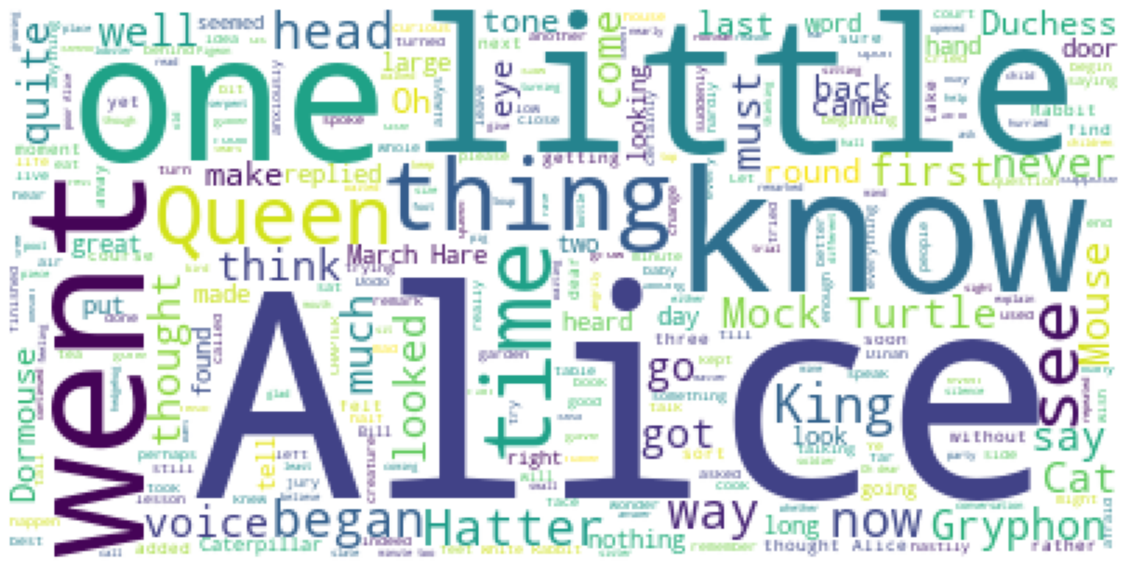

In [82]:
#step1 - preprocessing

stopwordsrem = set(STOPWORDS)
stopwordsrem.add('said')#As 'said' was first there twice also


#step 2-wordcloud object

alicewc = WordCloud(
    background_color = 'white',
    max_words = 2000,#How many maximum words you want
    stopwords = stopwordsrem
)


#step3 - use the object to call function
alicewc.generate(alice_novel)

# step 4 - display
fig=plt.figure()
fig.set_figwidth(20)
fig.set_figheight(20)
plt.imshow(alicewc)
plt.axis('off')#as here there is no axis
plt.show()